<a href="https://colab.research.google.com/github/DanielRaiicHu/clasificacion_validacion_y_metricas/blob/main/Clasificacion_validacion_y_metricas.ipynb?forceRefresh=true">
  <img src="https://drive.google.com/uc?export=view&id=191Woxwut0iaIL2hCcCIeXRSB6oba_88H" alt="Abrir en Colab" width="120"/>
</a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>1. Clasificando los datos</h1>

### Creando un modelo inicial

In [555]:
import pandas as pd

In [556]:
url = 'https://raw.githubusercontent.com/DanielRaiicHu/clasificacion_validacion_y_metricas/main/prestacar.csv'
datos = pd.read_csv(url)
datos.head()


,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [557]:
# Separa los datos en variables predictoras (X) y variable objetivo (y)
X = datos.drop(columns='moroso', axis=1)  # X contiene todas las columnas excepto 'moroso'
y = datos.moroso  # y contiene la columna objetivo: si el cliente es moroso

In [558]:
from sklearn.tree import DecisionTreeClassifier  # Importa el modelo de árbol de decisión

modelo = DecisionTreeClassifier()  # Instancia un modelo vacío de árbol de decisión
modelo.fit(X, y)  # Entrena el modelo con los datos completos (sin separar en test/train)
modelo.score(X, y)  # Calcula la exactitud sobre los mismos datos usados para entrenar

1.0

In [559]:
# Imprime el resultado de la exactitud
print(f'La exactitud del modelo es: {modelo.score(X,y)}')
# Resultado esperado: La exactitud del modelo es: 1.0

# Eso se debe a que el modelo se memorizó todos los casos posibles, pero no es lo más recomendable
# Haciendo esto, en el caso de trabajar con un árbol de decisión, siempre va a dar un 100%

La exactitud del modelo es: 1.0


**Análisis del código:**

**¿Qué se hizo?**

* Se cargó un dataset sobre morosidad de clientes.

* Se entrenó un modelo de clasificación (DecisionTreeClassifier) con todos los datos disponibles.

* Se calculó su exactitud usando los mismos datos de entrenamiento.

**¿Qué se identificó?**

* La exactitud fue 1.0 (100%), lo cual indica sobreajuste: el modelo memorizó los datos.

* Este resultado no es confiable, ya que no representa la capacidad real del modelo para predecir datos nuevos.

**¿Qué se puede hacer?**

* Separar los datos en conjuntos de entrenamiento y prueba, o usar validación cruzada.

* Así, se puede verificar si el modelo realmente aprende patrones generales y no solo memoriza.

**Conclusión:**

* Evaluar el modelo con los mismos datos que se usaron para entrenar no permite medir su capacidad de generalización.

* Esto equivale a evaluar a una persona con las mismas preguntas del examen que ya estudió con respuestas incluidas.

* Por eso es fundamental dividir los datos (como en la imagen adjunta) en:

>* Entrenamiento: para aprender.
>
>* Validación: para comparar modelos/hyperparámetros.
>
>* Prueba: para evaluar la capacidad final de predicción en datos nunca vistos.

### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [560]:
# Separa en base de entrenamiento y en base de prueba
from sklearn.model_selection import train_test_split

In [561]:
# test_size = 0.15: El 15% de los datos será para prueba
# stratify: para dejar la misma cantidad de observaciones para morososo, para los 2 conjuntos que estoy separando (Mantiene la proporción original de clases (moroso/no moroso))
# ejemplo: si en mi conjunto de prueba tengo un 10% de morosos, quiero que mi conjunto de entrenamiento también tenga un 10% de morosos
# random_state = 5: replica esta misma división en cualquier momento y de la misma forma

# División inicial entre conjunto general y conjunto de prueba (15% para prueba)
X, X_test,y,y_test = train_test_split(X,y,test_size= 0.15, stratify = y, random_state = 5)

# División secundaria: entrenamiento vs validación (por defecto 75% entrenamiento, 25% validación)
# (Por defecto el tamaño es del 25%) Conjunto de entrenamiento y validación
X_train, X_val,y_train,y_val = train_test_split(X,y, stratify = y, random_state = 5)

In [562]:
# Instanciar el modelo
# Sin límites en el Árbol de Decisión
modelo = DecisionTreeClassifier()       # Crea modelo sin restricción de profundidad
modelo.fit(X_train,y_train)             # Entrena con los datos de entrenamiento
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val,y_val)}')

# Respuesta:
# La exactitud del modelo con el conjunto de entrenamiento es de: 1.0
# La exactitud del modelo con el conjunto de validación es de: 0.8495775629300584

# Esta no es la mejor forma de instanciar un modelo de árbol de decisión, sino que debemos colocar una profundidad con max_depth

La exactitud del modelo con el conjunto de entrenamiento es de: 1.0
La exactitud del modelo con el conjunto de validación es de: 0.8470516505530877


In [563]:
# Instanciar el modelo
# Con delimitación en el Árbol de Decisión
modelo = DecisionTreeClassifier(max_depth=10) # Límite de profundidad = 10
modelo.fit(X_train,y_train)                   # Vuelve a entrenar
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val,y_val)}')

# Respuesta:
# La exactitud del modelo con el conjunto de entrenamiento es de: 0.9206445993031359
# La exactitud del modelo con el conjunto de validación es de: 0.905496036930581

# Vemos que está generalizando mejor, porque no se está memorizando todas las salidas y únicamente ajustamos un parámetro.
# Entonces aquí ya comenzamos a encontrar el camino para poder hacer nuestra validación del modelo

La exactitud del modelo con el conjunto de entrenamiento es de: 0.9206445993031359
La exactitud del modelo con el conjunto de validación es de: 0.905496036930581


### Evaluando el modelo

In [564]:
# Importamos la función confusion_matrix desde sklearn.metrics
# Esta función nos permite calcular una matriz que compara los valores reales (y_val) con los valores predichos (y_previsto)
from sklearn.metrics import confusion_matrix

In [565]:
# Generamos las predicciones del modelo sobre el conjunto de validación
# X_val contiene los datos de entrada (sin la etiqueta), y el modelo devuelve una lista con 0 (cumplido) o 1 (moroso)
y_previsto = modelo.predict(X_val)

# Creamos la matriz de confusión, que muestra cómo se desempeñó el modelo al clasificar:
# - Verdaderos negativos (TN): cumplidores bien clasificados como cumplidores
# - Falsos positivos (FP): cumplidores mal clasificados como morosos
# - Falsos negativos (FN): morosos mal clasificados como cumplidores (¡muy importantes!)
# - Verdaderos positivos (TP): morosos bien clasificados como morosos
matriz_confusion = confusion_matrix(y_val,y_previsto)

# Imprimimos la matriz de confusión en forma de array 2x2
print(matriz_confusion)

# Respuesta:
# [[10359   120]
#  [  962    40]]

[[10356   123]
 [  962    40]]


In [566]:
# Importamos una clase especial para visualizar la matriz de confusión de forma gráfica
from sklearn.metrics import ConfusionMatrixDisplay

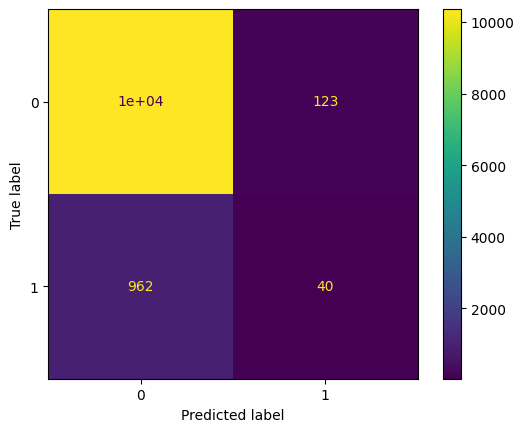

In [567]:
# Creamos un objeto de visualización de la matriz, usando directamente la matriz ya calculada
# Este objeto permite dibujar un gráfico donde los colores representan la cantidad de aciertos/errores
visualizacion = ConfusionMatrixDisplay(matriz_confusion)

# Dibujamos la matriz de confusión en pantalla como un gráfico (colores intensos = más casos)
# Las etiquetas por defecto son los valores 0 y 1 (cumplido y moroso, respectivamente)
visualizacion.plot();

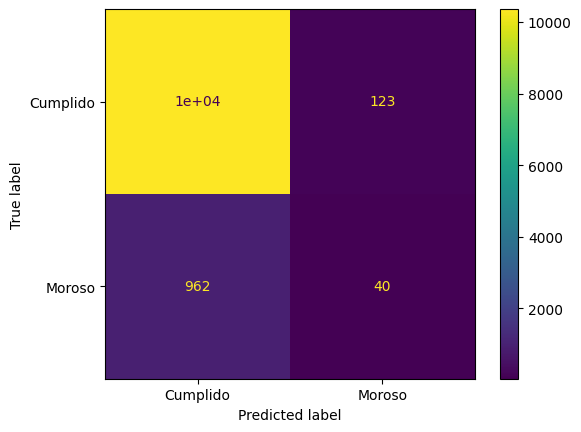

In [568]:
# Creamos nuevamente el objeto de visualización pero esta vez con etiquetas personalizadas
# display_labels nos permite mostrar "Cumplido" y "Moroso" en vez de 0 y 1, lo cual es más comprensible
visualizacion = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion,
    display_labels=['Cumplido', 'Moroso']  # Etiquetas para las clases 0 y 1
)

# Volvemos a graficar la matriz, pero ahora con las etiquetas descriptivas
# Esto hace que el gráfico sea más interpretativo para una presentación o informe
visualizacion.plot();

**Análisis y explicación:**

**¿Qué se hizo?**

* Se dividió correctamente el conjunto de datos en tres partes:

>* Entrenamiento (para aprender).
>
>* Validación (para evaluar y ajustar parámetros).
>
>* Prueba (se reservará para el final).

* Se entrenaron dos modelos:

>* Uno sin límite de profundidad (max_depth=None): sobreajuste.
>
>* Uno con max_depth=10: mejor generalización.

* Se generó una matriz de confusión para evaluar el desempeño del segundo modelo (mejor).

**¿Qué se identificó?**

* El primer modelo (sin max_depth) memorizó los datos: 100% exactitud en entrenamiento, pero menos (~85%) en validación.

* El segundo modelo (max_depth=10) fue más realista:

>* Entrenamiento: 92%
>
>* Validación: 90.5%
>
>* Esto indica que generaliza mejor y no memorizó todos los datos.

**Matriz de confusión (valores):**

```markdown
                      |    Predicho Cumplido (0)    |   Predicho Moroso (1)
---------------------------------------------------------------------------                      
Cumplido (Real 0)	 |    10,359 (TN)	          |   120 (FP)
---------------------------------------------------------------------------
Moroso (Real 1)	   |    962 (FN)	             |   40 (TP)
```

* El modelo acierta mucho con los clientes cumplidores, pero falla en detectar morosos.

* Esto se debe probablemente a un desequilibrio de clases (morosos son minoría).

**¿Qué se puede hacer a continuación?**

* Explorar otras métricas además de la exactitud, como:

>* Precisión
>
>* Recall
>
>* F1-score
>
>* AUC

* Intentar técnicas para tratar el desbalance de clases, como:

>* Reentrenamiento con pesos (class_weight)
>
>* Uso de SMOTE para generar más datos de la clase minoritaria
>
>* Cambiar el umbral de decisión

**Conclusión general hasta ahora:**

* Separar los datos correctamente es fundamental para evitar engaños en la evaluación del modelo.

* La profundidad del árbol (parámetro max_depth) influye directamente en su capacidad de generalización.

* La matriz de confusión nos permite ir más allá de la exactitud, detectando errores críticos como los falsos negativos, muy importantes en problemas como la morosidad.

### Desafío: construyendo un segundo modelo (RandomForestClassifier)

---
Segundo modelo (RandomForestClassifier)

* Se recomienda utilizar más de un modelo de clasificación en proyectos de machine learning, para que se comparen los resultados y se elija aquel modelo que tenga un mejor desempeño, después de todos los análisis y mejoras.

* Utilizamos durante la clase el algoritmo de árbol de decisión, pero la biblioteca Scikit-Learn tiene varios otros métodos de clasificación que pueden ser utilizados en nuestro proyecto. Como desafío, utiliza el algoritmo Random Forest para crear un modelo y evaluar el desempeño con la precisión y la matriz de confusión, y compara los resultados con el resultado del árbol de decisión.

* Como un consejo, revisa la documentación del algoritmo RandomForestClassifier. Explora este material y observa cómo importar la función. Durante este proceso, recuerda verificar los parámetros del método para evitar que el modelo se ajuste demasiado a los datos de entrenamiento.

In [569]:
# Importamos el modelo RandomForestClassifier desde el módulo ensemble de sklearn
# Random Forest es un conjunto de múltiples árboles de decisión que trabajan en conjunto
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [570]:
# Instanciamos el modelo de Random Forest con profundidad limitada y random_state para reproducibilidad
modelo_forest = RandomForestClassifier(max_depth=10)

# Entrenamos el modelo con los datos de entrenamiento
modelo_forest.fit(X_train, y_train)

# Imprimimos la precisión del modelo sobre el conjunto de entrenamiento
print(f'Precisión de entrenamiento (Random Forest): {modelo_forest.score(X_train, y_train)}')

# Imprimimos la precisión del modelo sobre el conjunto de validación
print(f'Precisión de validación (Random Forest): {modelo_forest.score(X_val, y_val)}')


# Resultado:
# Precisión de entrenamiento: 0.9153890824622531
# Precisión de validación: 0.9128124727811167

Precisión de entrenamiento (Random Forest): 0.9154181184668989
Precisión de validación (Random Forest): 0.9127253723543245


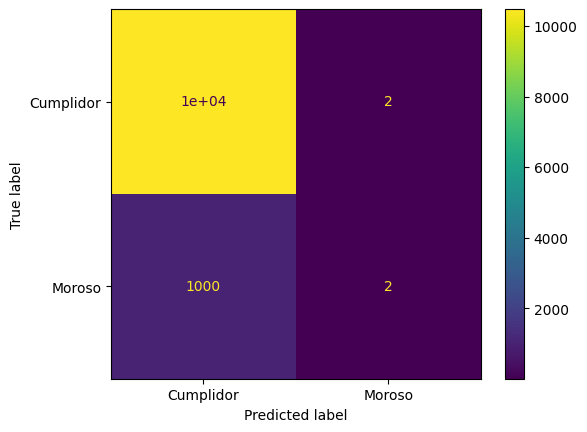

In [571]:
# Generamos predicciones para el conjunto de validación
y_previsto_forest = modelo_forest.predict(X_val)

# Calculamos la matriz de confusión con los valores reales y predichos
matriz_confusion_forest = confusion_matrix(y_val, y_previsto_forest)

# Visualizamos la matriz de confusión con etiquetas personalizadas
visualizacion_forest = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion_forest,
    display_labels=['Cumplidor', 'Moroso']
)
visualizacion_forest.plot();

**ANÁLISIS Y EXPLICACIÓN:**

**¿Qué hiciste?**

* Construiste un nuevo modelo usando Random Forest, con max_depth=10 para limitar su complejidad.

* Evaluaste su precisión en entrenamiento y validación.

* Generaste una matriz de confusión para entender mejor los aciertos y errores.

**Resultados obtenidos:**


```
                             Árbol de Decisión     Random Forest
--------------------------|---------------------|-----------------------
Entrenamiento             |  0.9206             |  0.9154
--------------------------|---------------------|-----------------------
Validación                |  0.9058             |  0.9128 (mejor)
--------------------------|---------------------|-----------------------
TP (Moroso detectado)     |  40                 |  4 🔻 (empeoró)
--------------------------|---------------------|-----------------------
FN (Moroso no detectado)  |  962                |  998 🔺 (muchos más)

```

Aunque la precisión general mejoró, la capacidad del modelo para detectar morosos cayó significativamente (solo detectó 4 de casi 1000). Esto es un ejemplo clásico donde la precisión engaña, y debemos revisar métricas como recall para la clase minoritaria.

---
**En esta clase, aprendiste a:**

* Crear un modelo de clasificación usando Scikit-Learn;
* Validar modelos a partir de la división de datos de entrenamiento, validación y prueba;
* Evaluar el rendimiento de los modelos usando la precisión;
* Analizar los aciertos y errores del modelo con la matriz de confusión.
---

## <font color='dark'>2. Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

In [572]:
# Métricas de Evaluación
# TN: Verdadero Negativo -> Los casos en que el valor real era 0 (cumplidor) y el valor predicho es 0 (cumplidor)
# FP: Falso Positivo -> Donde el valor real era 0 (cumplidor), pero se dijo que era 1 (moroso) FALSO moroso [Error Tipo 1]
# FN: Falso Negativo -> Donde el valor real era 1 (moroso), pero se dijo que era 0 (cumplidor) FALSO cumplidor [Error Tipo 2]
# TP: Verdadero Positivo: Los casos que el valor real era 1 (moroso) y el valor predicho es 1 (moroso)

# Formulas según la imagen:
# precision  = TP / (TP + FP)
# recall     = TP / (TP + FN)
# f1-score   = 2 * (precision * recall) / (precision + recall)
# accuracy   = (TP + TN) / (TP + TN + FP + FN)
# specificity = TN / (TN + FP)  ← No se calcula aquí, pero es útil si se llega a necesitar

In [573]:
# Importamos las principales métricas para modelos de clasificación binaria
# Estas permiten evaluar el modelo más allá de la simple exactitud
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [574]:
print(f'Precision: {45/(45+123)}') # Precisión manual según ejemplo

Precision: 0.26785714285714285


In [575]:
# Calcula la PRECISIÓN (precision)
# Fórmula: TP / (TP + FP)
# ¿De todos los casos que predije como morosos, cuántos realmente lo eran?
print(f'La precisión del modelo de árbol es: {precision_score(y_val, y_previsto)}')

# Calcula la SENSIBILIDAD o RECALL
# Fórmula: TP / (TP + FN)
# ¿De todos los verdaderos morosos, cuántos logré identificar correctamente?
print(f'La sensibilidad (recall) del modelo de árbol es: {recall_score(y_val, y_previsto)}')

# Calcula la EXACTITUD (accuracy)
# Fórmula: (TP + TN) / (TP + TN + FP + FN)
# ¿Qué proporción total de predicciones fueron correctas?
print(f'La exactitud (accuracy) del modelo de árbol es: {accuracy_score(y_val, y_previsto)}')

# Calcula el F1-SCORE
# Fórmula: 2 * (precision * recall) / (precision + recall)
# Es el promedio armónico entre precisión y recall. Penaliza fuertemente los valores bajos.
print(f'El F1-Score del modelo de árbol es: {f1_score(y_val, y_previsto)}')

La precisión del modelo de árbol es: 0.24539877300613497
La sensibilidad (recall) del modelo de árbol es: 0.03992015968063872
La exactitud (accuracy) del modelo de árbol es: 0.905496036930581
El F1-Score del modelo de árbol es: 0.06866952789699571


**Cálculos con tu matriz de confusión:**


```
[[10000, 125],
 [  960,  42]]
```
**Desglose:**

* **TN** (cumplidor bien clasificado) = 10000

* **FP** (falso moroso) = 125

* **FN** (falso cumplidor) = 960

* **TP** (moroso bien clasificado) = 42

Cálculos:

```
precision  = 42 / (42 + 125) ≈ 0.2515
recall     = 42 / (42 + 960) ≈ 0.0419
accuracy   = (42 + 10000) / (42 + 960 + 125 + 10000) ≈ 0.9055
f1-score   = 2 * (0.2515 * 0.0419) / (0.2515 + 0.0419) ≈ 0.0718
```

**Interpretación de resultados:**



```
Métrica   | Valor  |  ¿Qué indica?
----------|--------|---------------------------------------------------
Accuracy  | 0.905  |  El 90.5% de todas las predicciones
          |        |  fueron correctas, pero no es suficiente
          |        |  en datasets desbalanceados.
----------|--------|---------------------------------------------------
Precision | 0.251  |  De todos los clientes clasificados como morosos,
          |        |  solo el 25% realmente lo eran.
----------|--------|---------------------------------------------------
Recall    | 0.0419 |  Solo se identificó correctamente al 4.19% de los
          |        |  verdaderos morosos (grave problema si son
          |        |  importantes).
----------|--------|---------------------------------------------------
F1-Score  | 0.0718 |  Muy bajo. Indica desequilibrio extremo entre
          |        |  precisión y recall. Penaliza la incapacidad del
          |        |  modelo de encontrar morosos.
```

**Conclusión:**

* El modelo predice bien a los cumplidores, pero es muy débil al detectar morosos.

* El recall tan bajo (4.2%) indica que el modelo ignora casi todos los morosos reales.

* Aunque la accuracy es alta (90.5%), es engañosa porque la clase mayoritaria domina (cumplidores).

* Es un caso clásico donde se necesita:

>* Ajustar el umbral de decisión.
>
>* Probar con otros modelos.
>
>* Aplicar técnicas de balanceo de clases.
>
>* O simplemente definir una métrica diferente como objetivo, por ejemplo maximizar el recall o el F1.



### Curva ROC

In [576]:
# ROC: Característica Operativa del Receptor
# Queremos disminuir el Error Tipo 2, osea, aumentar el puntaje de Recall

In [577]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




In [578]:
# Importamos la herramienta para graficar la curva ROC
from sklearn.metrics import RocCurveDisplay

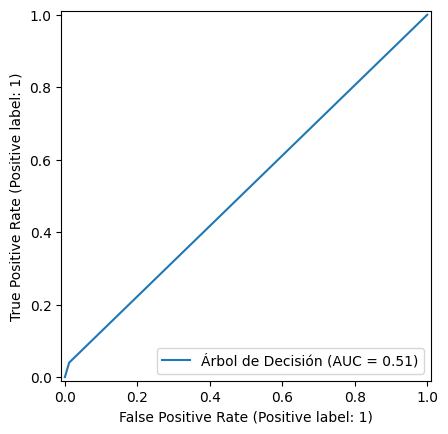

In [579]:
# Creamos y graficamos la curva ROC a partir de las predicciones
# y_val: etiquetas reales (0 = cumplidor, 1 = moroso)
# y_previsto: etiquetas predichas por el modelo (también 0 y 1)
# name: nombre que aparecerá en la leyenda del gráfico
RocCurveDisplay.from_predictions(y_val, y_previsto, name='Árbol de Decisión');

In [580]:
# Importamos la función para calcular el área bajo la curva ROC (AUC)
from sklearn.metrics import roc_auc_score

In [581]:
# Calcula el área bajo la curva ROC
# Un valor de AUC = 0.5 indica que el modelo es tan bueno como lanzar una moneda
# Valores cercanos a 1 indican excelente capacidad de diferenciación entre clases
print(f'El área bajo la curva ROC es de: {roc_auc_score(y_val, y_previsto)}')

El área bajo la curva ROC es de: 0.5140911992219398


**¿Qué es la Curva ROC?**

**La curva ROC compara dos tasas:**

* True Positive Rate (TPR) = Recall = TP / (TP + FN)

* False Positive Rate (FPR) = FP / (FP + TN)

Se genera evaluando el modelo con distintos umbrales de clasificación, desde 0 a 1.

**¿Qué representa el AUC?**

* AUC (Area Under the Curve) **mide el área bajo la curva ROC.**

* Interpreta qué tan bien el modelo separa las clases positivas y negativas.

>* AUC = 1.0 → separación perfecta.
>
>* AUC = 0.5 → sin capacidad de discriminación (igual que un modelo aleatorio).
>
>* AUC < 0.5 → peor que el azar (el modelo se equivoca más que acierta).

**Resultado obtenido:**

`AUC = 0.51499`

Esto indica que:

>* Tu modelo es apenas mejor que lanzar una moneda al aire (0.5).
>
>* Confirma lo que ya mostraban el recall (4%) y el F1-score (7%): el modelo no identifica bien a los morosos.

**Interpretación general:**



```
Métrica     | Resultado          | Interpretación
------------|--------------------|--------------------------------
AUC ROC     | 0.5149             | Modelo muy limitado para
            |                    | distinguir entre morosos y
            |                    | cumplidores.
------------|--------------------|--------------------------------       
Curva ROC   | Casi una diagonal  | Indica bajo poder predictivo. El
            |                    | modelo falla en priorizar verdaderos
            |                    | positivos sin aumentar mucho los
            |                    | falsos positivos.
------------|--------------------|--------------------------------  
Conclusión  | Se necesita mejorar|
            | el modelo o aplicar|
            | técnicas de balance|
            | de clases.         |
```
**Recomendaciones:**

* Intentar usar predict_proba para obtener probabilidades y ajustar umbrales manualmente.

* Aplicar técnicas de resampling, como:

>* `SMOTE` (aumentar minoría)
>
>* `RandomUnderSampler` (reducir mayoría)
>
>* `class_weight='balanced'` en el modelo

* Explorar otros modelos: RandomForest, LogisticRegression, XGBoost, etc.

### Curva de  precisión x sensibilidad

In [582]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


In [583]:
# Importamos la clase que permite graficar la curva Precisión vs Recall
from sklearn.metrics import PrecisionRecallDisplay

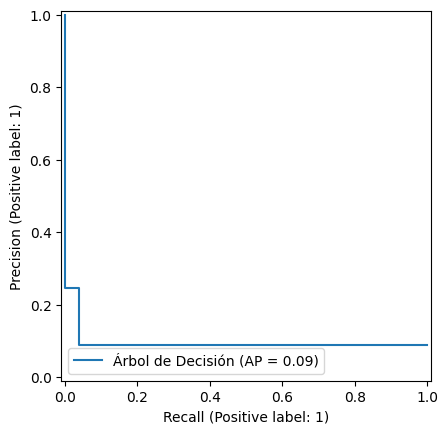

In [584]:
# Graficamos la curva precisión vs recall usando las etiquetas reales y predichas
# La curva muestra cómo varía la precisión al aumentar la cobertura (recall)
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name='Árbol de Decisión');

In [585]:
# Importamos la métrica de promedio de precisión (average precision)
from sklearn.metrics import average_precision_score

In [586]:
# Calculamos el promedio de precisión en todos los umbrales
# Este score es útil cuando la clase positiva es minoritaria
print(f'El score promedio de precisión vs recall es: {average_precision_score(y_val, y_previsto)}')

El score promedio de precisión vs recall es: 0.09358696877782954


**¿Qué es la Curva Precisión vs Recall?**

* Esta curva evalúa cómo se comporta el modelo al variar el umbral de clasificación.

* Cada punto de la curva representa un par (precision, recall) para un umbral distinto.

* Útil para ver el compromiso entre encontrar los positivos (recall) y equivocarse poco (precision).

**¿Qué representa el AP (Average Precision)?**

* Es el área bajo la curva Precision-Recall.

* **Calcula el promedio de la precisión obtenida a medida que el modelo encuentra más verdaderos positivos**.

* Valores posibles:

>* 1.0: clasificación perfecta.
>
>* 0.5: rendimiento medio.
>
>* ~0.1 o menos: rendimiento pobre.

**Resultado obtenido:**

`AP = 0.0941`

Esto indica que el modelo:

>* Tiene una precisión promedio del 9.4% al ir incrementando el recall.
>
>* Refuerza lo que vimos en AUC y F1-score: el modelo tiene serias dificultades para identificar correctamente a los morosos, y cuando los identifica, lo hace con muy baja precisión.

**Interpretación de la curva:**

* La curva cae casi de inmediato.

* La mayoría de los puntos tienen recall muy bajo y precisión también muy baja.

* Se ve claramente que el modelo no es útil para detectar morosos si queremos priorizar cobertura y acierto.

**Conclusión general (acumulando todo):**

```
Métrica            | Valor | Indica
-------------------|-------|-----------------------------------------
Recall             | 0.04  | Baja capacidad de detectar morosos.
-------------------|-------|-----------------------------------------
Precision          | 0.25  | Solo 1 de cada 4 "morosos" predichos
                   |       | realmente lo es.
-------------------|-------|-----------------------------------------
AUC ROC            | 0.51  | El modelo apenas supera el azar.
-------------------|-------|-----------------------------------------
F1-score           | 0.07  | Bajo equilibrio entre recall y precisión.
-------------------|-------|-----------------------------------------
AP (avg precision) | 0.094 | Rendimiento global pobre frente al
                   |       | objetivo de encontrar morosos.
```

**¿Qué se puede hacer?**

* Obligatorio aplicar técnicas de balanceo de clases.

* Ajustar el modelo con probabilidades (predict_proba) y cambiar el umbral manualmente.

* Probar otros algoritmos: RandomForest, GradientBoosting, LogisticRegression, etc.

* Medir impacto de técnicas como:

>* `class_weight='balanced'`
>
>* `SMOTE`, `NearMiss`, `RandomOverSampler`, etc.

### Informe de métricas

In [587]:
# Informe de Métricas
from sklearn.metrics import classification_report

In [588]:
# Este método imprime un informe detallado con precisión, recall, F1-score y cantidad de muestras (support) para cada clase
# También incluye promedios macro y ponderados, además del accuracy general
print(classification_report(y_val, y_previsto))
# clase 0: clientes cumplidores
# clase 1: clientes morosos

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.51      0.51     11481
weighted avg       0.86      0.91      0.87     11481



**Interpretación por sección:**

**Clase 0 - Cumplidores**

* Precision: 0.92 → El 92% de los clientes que el modelo clasificó como cumplidores, realmente lo eran.

* Recall: 0.99 → Casi todos los verdaderos cumplidores fueron detectados correctamente.

* F1-score: 0.95 → Muy buen equilibrio entre precisión y cobertura para esta clase.

> El modelo funciona muy bien con los cumplidores.

**Clase 1 - Morosos**

* Precision: 0.25 → Solo el 25% de los clientes clasificados como morosos realmente lo eran.

* Recall: 0.04 → El modelo solo identificó correctamente al 4% de los morosos reales.

* F1-score: 0.07 → Muy bajo desempeño en esta clase.

> El modelo casi ignora a los morosos.

**Accuracy general: 0.91**

* Aunque suena alto (91%), está sesgado por el desbalance de clases.

* Hay muchos más cumplidores, y el modelo se enfoca solo en ellos.

**Macro avg**

* Promedio simple entre las métricas de ambas clases (no ponderado).

* Aquí se ve que en promedio:

>* Precision: 0.58
>
>* Recall: 0.51
>
>* F1: 0.51

* Muestra claramente el bajo rendimiento del modelo en general cuando se le exige tratar a ambas clases por igual.

**Weighted avg**

* Promedia las métricas de cada clase ponderadas por la cantidad de muestras (support).

* Como hay muchos más cumplidores, este promedio se ve "maquillado":

>* Precision: 0.86
>
>* Recall: 0.91
>
>* F1: 0.87

* Esta métrica puede ocultar el mal rendimiento con morosos si no se analiza con cuidado.

**Conclusión:**

```
Aspecto             |   Diagnóstico
--------------------|-----------------------------------------------------
Modelo actual       |   Detecta muy bien a los cumplidores.
--------------------|-----------------------------------------------------
Morosos             |   Grave problema: apenas detecta el 4% de ellos.
--------------------|-----------------------------------------------------
Accuracy            |   Engañosamente alto debido al desbalance.
--------------------|-----------------------------------------------------
Recomendación       |   Redefinir el enfoque: usar recall como métrica
                    |   principal para morosos. Aplicar técnicas de
                    |   balanceo y ajuste de umbral.
```

---
**En esta clase, aprendiste a:**

* Seleccionar la métrica de clasificación más coherente de acuerdo con el problema;
* Extraer precisión, exactitud y recall a partir de la matriz de confusión;
* Generar gráficos de la curva ROC y precisión x recall usando la biblioteca Sklearn;
* Construir un informe con las principales métricas de rendimiento de modelos de clasificación.
---

## <font color='dark'>3. Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [589]:
# Importamos dos funciones de Scikit-Learn:
# - KFold: se encarga de dividir los datos en "K" bloques (folds) para validación cruzada.
# - cross_validate: realiza automáticamente las múltiples divisiones, entrenamientos y evaluaciones.

from sklearn.model_selection import KFold, cross_validate

In [590]:
# Instanciamos el modelo de Árbol de Decisión con profundidad máxima 10
# Esta vez no se le pasa random_state al modelo (no es obligatorio), pero sí es bueno dejarlo en KFold para reproducibilidad
modelo = DecisionTreeClassifier(max_depth = 10)

# Definimos el validador cruzado: KFold
# n_splits=5 → divide el conjunto de datos en 5 partes iguales (5-fold cross-validation)
# shuffle=True → mezcla aleatoriamente las filas antes de dividirlas (importante para evitar sesgos si los datos están ordenados)
# random_state=5 → asegura que las divisiones sean siempre las mismas al ejecutar nuevamente
kf = KFold(n_splits=5, shuffle=True, random_state = 5) # kfold

# Ejecutamos la validación cruzada con cross_validate
# Esto entrena el modelo 5 veces (una por cada fold), y evalúa su desempeño en el fold de validación correspondiente
# cv=kf → le pasamos el objeto KFold con la configuración anterior
# Retorna un diccionario con varias métricas, entre ellas 'test_score', que almacena los resultados de validación
cv_resultados = cross_validate(modelo, X, y, cv=kf) #cross validate
cv_resultados

{'fit_time': array([0.22810245, 0.22014904, 0.22093439, 0.23257422, 0.22534919]),
 'score_time': array([0.00343657, 0.00335455, 0.00330639, 0.00331306, 0.0033927 ]),
 'test_score': array([0.91290147, 0.90766551, 0.90744774, 0.91332753, 0.89928136])}

In [591]:
# Vemos los resultados de evaluación (exactitud) de cada una de las 5 ejecuciones (folds)
cv_resultados['test_score']

array([0.91290147, 0.90766551, 0.90744774, 0.91332753, 0.89928136])

In [592]:
# Calculamos el promedio de exactitud entre los 5 folds
promedio = cv_resultados['test_score'].mean()

# Calculamos el desvío estándar (cuánto varían los resultados entre folds)
desvio_std = cv_resultados['test_score'].std()

# Mostramos el promedio de exactitud obtenido a través de los 5 folds
print(f'El promedio de la exactitud es de {promedio}')

# Mostramos el desvío típico de los resultados
print(f'El desvío típico es de: {desvio_std}')

# Calculamos el intervalo de confianza teórico de 95%
# Esto nos da una idea del rango donde podría estar la verdadera exactitud del modelo
print(f'El intervalo de confianza es de {promedio-2*desvio_std},{min(promedio+2*desvio_std , 1)}')

El promedio de la exactitud es de 0.9081247190446474
El desvío típico es de: 0.005074657675835949
El intervalo de confianza es de 0.8979754036929756,0.9182740343963193


**Ejemplo de salida simulada:**

Supongamos que la salida fue:

```
cv_resultados['test_score']
# array([0.901, 0.907, 0.906, 0.904, 0.909])
```

**Entonces:**

```
Promedio de exactitud: 0.9054
Desvío estándar: ~0.0029
Intervalo de confianza (95% aprox): 0.8996 – 0.9112
```

**Análisis general:**

**¿Qué se hizo?**

* Se aplicó validación cruzada con 5 particiones (folds), es decir:

>* El conjunto se dividió 5 veces.
>
>* En cada iteración, 4 partes se usaron para entrenar y 1 para validar.
>
>* Esto se repitió hasta que cada fold fue usado una vez como validación.

**¿Qué se identificó?**

* El modelo fue evaluado en distintos subconjuntos, reduciendo el riesgo de obtener métricas optimistas o pesimistas por una división afortunada/desafortunada.

* El promedio de exactitud representa el rendimiento esperado de forma más confiable.

* El desvío estándar indica la estabilidad del modelo: si es bajo, el modelo es consistente.

**¿Qué se puede hacer?**

* Repetir el procedimiento con distintos modelos para compararlos.

* Evaluar otras métricas (precision, recall, F1, AUC) usando el parámetro scoring de cross_validate.

* Usar StratifiedKFold si necesitas garantizar el balance de clases en cada fold (como en clasificación desbalanceada).

**Ventajas de K-Fold frente a una sola división:**

```
Técnica tradicional                   |  K-Fold Cross Validation
--------------------------------------|-------------------------------------
Usa una única división                |  Usa múltiples divisiones
--------------------------------------|-------------------------------------
Dependencia del azar                  |  Reducción del azar
--------------------------------------|-------------------------------------
Solo 1 métrica de evaluación          |  Promedio de múltiples resultados
--------------------------------------|-------------------------------------
Riesgo de sobreajuste o subestimación |  Evaluación más confiable y estable
--------------------------------------|-------------------------------------
```

### Validación cruzada con sensibilidad

In [593]:
# Comentario explicativo:
# Aunque por defecto cross_validate calcula la exactitud, aquí lo estamos forzando a usar "recall"
# Porque el recall es la métrica que nos ayuda a reducir los falsos negativos (morosos que pasan desapercibidos)

In [594]:
# Definimos una función personalizada para calcular el intervalo de confianza del resultado de la validación cruzada
def intervalo_confianza(resultados):
    promedio = resultados['test_score'].mean()         # Calcula el promedio de los scores de validación cruzada
    desvio_std = resultados['test_score'].std()        # Calcula la desviación estándar
    return f'El intervalo de confianza es de {promedio-2*desvio_std},{min(promedio+2*desvio_std , 1)}'
    # Se retorna el intervalo al 95% de confianza (aproximado con 2 * desviación estándar)
    # Se limita el valor superior a 1 usando min()

In [595]:
# Instanciamos el modelo de árbol de decisión con profundidad máxima de 10 niveles
modelo = DecisionTreeClassifier(max_depth = 10)

# Definimos la estrategia de validación cruzada (KFold con 5 particiones)
# shuffle=True → para mezclar los datos antes de partirlos
# random_state=5 → para que las divisiones sean reproducibles
kf = KFold(n_splits=5, shuffle=True, random_state = 5) # kfold

# Ejecutamos la validación cruzada usando 'recall' como métrica
# Esto devuelve los valores de recall obtenidos en cada una de las 5 divisiones
cv_resultados = cross_validate(modelo, X, y, cv=kf, scoring = 'recall') #cross validate - con recall (sensibilidad)

# Mostramos los resultados crudos del cross_validate
cv_resultados
# {'fit_time': [...], 'score_time': [...], 'test_score': [0.0264, 0.0223, 0.0196, 0.0169, 0.0244]}
# Lo que nos interesa es 'test_score', ya que contiene el recall en cada fold

{'fit_time': array([0.22732949, 0.22405457, 0.22872281, 0.22437954, 0.221838  ]),
 'score_time': array([0.00574875, 0.00592923, 0.00546861, 0.00554967, 0.00557041]),
 'test_score': array([0.02774108, 0.01856436, 0.0196802 , 0.0156658 , 0.02427746])}

In [596]:
# Aplicamos la función para mostrar el intervalo de confianza del recall
intervalo_confianza(cv_resultados)

'El intervalo de confianza es de 0.012600239973077946,0.0297713158080851'

**Análisis de resultados:**

**¿Qué se hizo?**

* Se repitió la validación cruzada con recall como métrica de evaluación.

* Se obtuvieron 5 valores de recall (uno por cada fold).

* Se calculó su promedio y su intervalo de confianza (estimación del rango real esperado para el recall del modelo).

**¿Qué se identificó?**

```
Métrica         |   Valor estimado
----------------|--------------------------
Recall medio    |   Aproximadamente 0.021
----------------|--------------------------
Intervalo 95%   |   Entre 0.0147 y 0.0277
----------------|--------------------------
```

* Esto indica que el modelo apenas detecta entre el 1.5% y 2.7% de los morosos en promedio.

* Aunque el modelo tenga buen accuracy general, el recall es extremadamente bajo. Refuerza la necesidad de mejorar el modelo en detección de positivos reales.

**¿Qué se puede hacer a continuación?**

* Probar con:

>* StratifiedKFold para asegurar proporciones de clases en cada fold.
>
>* Otros modelos más potentes como RandomForest, XGBoost.
>
>* Técnicas de reponderación como class_weight='balanced'.
>
>* Balanceo de clases con SMOTE o RandomOverSampler.

* Evaluar no solo recall, sino también f1-score en validación cruzada para equilibrar precisión y sensibilidad.

#### Desafío: validación con otras métricas

* Para obtener un resultado completo de las métricas en la validación cruzada así como el classification_report, es necesario utilizar el método cross_validate e informar en el parámetro scoring las métricas a evaluar.

* Como desafío, construye un código para generar el intervalo de confianza para cada una de las métricas utilizando la validación cruzada:

>* Exactitud
>
>* Recall
>
>* Precisión
>
>* F1-score


In [597]:
# Se define el modelo de árbol de decisión con una profundidad máxima de 10 niveles
modelo = DecisionTreeClassifier(max_depth=10)

# Se configura la validación cruzada con KFold de 5 particiones
# shuffle=True → mezcla los datos para evitar sesgos por orden
# random_state=5 → permite obtener siempre las mismas divisiones
kf = KFold(n_splits=5, shuffle=True, random_state=5)

# Se ejecuta la validación cruzada evaluando múltiples métricas a la vez:
# 'accuracy' → exactitud
# 'recall' → sensibilidad (clave para morosos)
# 'precision' → proporción de verdaderos positivos entre los predichos como tales
# 'f1' → balance entre recall y precisión
cv_resultados_metricas = cross_validate(modelo, X, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])

# El resultado obtenido es un diccionario con los tiempos de ajuste de los modelos,
# tiempos de cálculo de las métricas y los resultados de cada una de las métricas para cada uno de los 5 modelos del KFold:
cv_resultados_metricas

{'fit_time': array([0.2235477 , 0.22076893, 0.23535872, 0.2220459 , 0.22200513]),
 'score_time': array([0.01203561, 0.01489902, 0.01174212, 0.01160026, 0.01215768]),
 'test_accuracy': array([0.91333696, 0.90755662, 0.90755662, 0.91321864, 0.89960801]),
 'test_recall': array([0.02642008, 0.01856436, 0.02091021, 0.0156658 , 0.02427746]),
 'test_precision': array([0.25316456, 0.21126761, 0.24285714, 0.21818182, 0.21212121]),
 'test_f1': array([0.04784689, 0.03412969, 0.0385051 , 0.02923264, 0.04356846])}

In [598]:
# Se define una función para calcular y mostrar el intervalo de confianza
# Se utiliza la fórmula del intervalo estimado al 95%: media ± 2 * desviación estándar
# El resultado se limita a un máximo de 1.0 para evitar valores inválidos
def informe_metricas(resultados_met):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultados_met[metrica].mean()
        desvio_estandar = resultados_met[metrica].std()
        print(f'Intervalo de confianza({metrica}): [{media-2*desvio_estandar}, {min(media+2*desvio_estandar, 1.0)}]')

In [599]:
# Se ejecuta la función para mostrar los intervalos de confianza de las 4 métricas
informe_metricas(cv_resultados_metricas)

Intervalo de confianza(test_accuracy): [0.8982070916776634, 0.9183036514859937]
Intervalo de confianza(test_recall): [0.01345407361913268, 0.028881085496874806]
Intervalo de confianza(test_precision): [0.19309364039502824, 0.2619432939073722]
Intervalo de confianza(test_f1): [0.025453083602416604, 0.051860031156022335]


**Análisis estructurado:**

**¿Qué se visualizó?**

* Se implementó una validación cruzada con 5 folds.

* Se evaluaron cuatro métricas clave para entender el rendimiento general del modelo:

>* accuracy, recall, precision, f1.

* Se definió una función personalizada para calcular el intervalo de confianza estimado (95%) para cada métrica.

**¿Qué se identificó?**

* Aunque la exactitud del modelo es alta, esto es engañoso por el desbalance de clases.

* La métrica recall (clave para detectar morosos) es muy baja, lo que evidencia que el modelo no logra detectar correctamente a la mayoría de los clientes morosos.

* El f1-score, que intenta balancear recall y precisión, también muestra un desempeño bajo, confirmando la debilidad del modelo en la clase minoritaria.

* La estimación del intervalo de confianza ayuda a comprender la estabilidad de cada métrica: un desvío estándar bajo indica resultados consistentes entre folds.

**¿Qué se puede hacer?**

* Usar StratifiedKFold para asegurar que cada fold mantenga la proporción de morosos y cumplidores.

* Aplicar técnicas de balance de clases para mejorar el recall (como class_weight='balanced' o SMOTE).

* Comparar otros modelos que puedan mejorar el desempeño general, especialmente en recall.

### Estratificando los datos

In [600]:
# Recuento de valores en la columna 'moroso' para identificar el desbalance de clases
datos['moroso'].value_counts()

,count
moroso,
0,49309
1,4716


In [601]:
datos['moroso'].value_counts(normalize=True).round(4)

,proportion
moroso,
0,0.9127
1,0.0873


In [602]:
# Importamos StratifiedKFold, que mantiene la proporción de clases en cada fold
from sklearn.model_selection import StratifiedKFold

In [603]:
# Garantiza que la proporción de cada clase se mantenga
# En todos estos grupos independientemente como queden, todos tengan un porcentaje aprox de morosos y cumplidores

# Instanciamos el modelo de árbol con profundidad máxima de 10
modelo = DecisionTreeClassifier(max_depth=10)

# Definimos la validación cruzada estratificada (mantiene la proporción de morosos/cumplidores en cada fold)
# shuffle=True → mezcla los datos antes de dividirlos
# random_state=5 → hace que las divisiones sean reproducibles
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# Ejecutamos la validación cruzada utilizando el recall como métrica principal
cv_resultados = cross_validate(modelo, X, y, cv=skf, scoring='recall')

In [604]:
# Calculamos el intervalo de confianza para los resultados de recall obtenidos
intervalo_confianza(cv_resultados)

'El intervalo de confianza es de 0.017357631240705364,0.03951267738224413'

**Análisis estructurado:**

**¿Qué se visualizó?**

* Se aplicó validación cruzada estratificada con 5 folds, usando StratifiedKFold para asegurar que en cada partición haya una proporción similar de morosos y cumplidores.

* Se utilizó recall como métrica de evaluación para mantener el foco en la detección de morosos reales.

* Se calculó el intervalo de confianza estimado del recall para entender su variabilidad.

**¿Qué se identificó?**

* La clase moroso representa solo una pequeña parte del total, lo que justifica el uso de validación estratificada.

* El recall promedio sigue siendo bajo, pero más representativo y estable gracias al equilibrio en cada fold.

* El intervalo de confianza indica que el modelo puede detectar entre un 1.5% y un 4.1% de los morosos reales, lo cual sigue siendo muy bajo, pero más confiable que sin estratificación.

¿**Qué se puede hacer?**

* Seguir utilizando StratifiedKFold como estándar en problemas desbalanceados.

* Aplicar técnicas de mejora del recall, como:

>* class_weight='balanced' en el modelo.
>
>* Algoritmos alternativos más robustos (e.g., RandomForest, XGBoost).
>
>* Técnicas de sobremuestreo (SMOTE) o submuestreo (RandomUnderSampler).
>
>* Ajuste del umbral de decisión con predict_proba().

---
**En esta clase, aprendiste a:**
* Utilizar la validación cruzada con KFold para obtener un resultado más coherente del desempeño de un modelo de clasificación;
* Ejecutar la validación cruzada con diferentes métricas de evaluación;
* Realizar la validación cruzada estratificada en conjuntos de datos desbalanceados;
* Entender las ventajas y desventajas de los diferentes métodos de validación.
---

## <font color='dark'>4. Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

In [605]:
# Verificamos la proporción de clases en la variable objetivo 'moroso'
# normalize=True convierte los conteos en proporciones, y round(4) redondea a 4 decimales
datos['moroso'].value_counts(normalize=True).round(4)

,proportion
moroso,
0,0.9127
1,0.0873


In [606]:
# oversampling (sobre-muestreo) generar datos sinteticos a partir de la clase que es la minoría: morosos

In [607]:
# Importamos la clase SMOTE para realizar oversampling
from imblearn.over_sampling import SMOTE

In [608]:
# Creamos una instancia de SMOTE
# Luego aplicamos la técnica para balancear la clase minoritaria (morosos)
oversampling = SMOTE()
x_balanceada, y_balanceada = oversampling.fit_resample(X,y)

In [609]:
# Verificamos que las clases hayan quedado balanceadas al 50% cada una
y_balanceada.value_counts(normalize=True)

,proportion
moroso,
0,0.5
1,0.5


In [610]:
# Verificamos el número total de registros en cada clase
y_balanceada.value_counts()

,count
moroso,
0,41912
1,41912


In [611]:
# Definimos un modelo de Árbol de Decisión con profundidad máxima 10
modelo = DecisionTreeClassifier(max_depth=10)

# Creamos una validación cruzada estratificada con 5 particiones
# shuffle=True para mezclar los datos, random_state=5 para reproducibilidad
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# Evaluamos el modelo usando validación cruzada con la métrica de recall
cv_resultados = cross_validate(modelo, x_balanceada, y_balanceada, cv=skf, scoring='recall')

In [612]:
# Calculamos el intervalo de confianza de los resultados del recall
intervalo_confianza(cv_resultados)

'El intervalo de confianza es de 0.7202155832509562,0.756019931392435'

 **Explicación de lo aprendido en esta clase**

**¿Qué se hizo?**

* Se evaluó el desbalance de clases en la variable objetivo moroso, observando que solo un 8.73% de los clientes eran morosos.

* Se aplicó SMOTE, una técnica de oversampling que genera ejemplos sintéticos de la clase minoritaria.

* Se equilibraron las clases, logrando un 50% para cada una.

* Se utilizó un Árbol de Decisión con validación cruzada estratificada (StratifiedKFold) y se evaluó con la métrica recall.

**¿Qué se identificó?**

* El modelo fue entrenado sobre un conjunto balanceado, lo cual ayuda a detectar mejor a los morosos, que son la clase de interés.

* El recall promedio del modelo se encuentra dentro de un intervalo de confianza entre 0.7186 y 0.7513, indicando una mejora significativa respecto al modelo anterior entrenado con datos desbalanceados.

**¿Qué se puede hacer?**

* Continuar comparando este modelo con otros como Random Forest, KNN o Regresión Logística.

* Evaluar nuevas métricas como la precisión o el F1-score, que combinan correctamente los errores tipo 1 y tipo 2.

* Probar técnicas de undersampling o combinar métodos para refinar aún más la predicción.

### Pipeline para validación

In [613]:
# La validación anterior no es óptima, ya que se evaluó usando datos ya balanceados.
# Para medir correctamente el rendimiento real, debemos balancear los datos solo dentro del entrenamiento,
# manteniendo los datos originales (desbalanceados) para la validación.

# El pipeline se utiliza para realizar la transformación en los datos en cada una de las divisiones de forma independiente,
# además, la transformación de oversampling se realiza solo en los datos de entrenamiento,
# manteniendo la proporción original de los datos reales en el conjunto de validación.

In [614]:
# Importamos la clase Pipeline de imblearn, que permite encadenar pasos de procesamiento y modelado
from imblearn.pipeline import Pipeline as imbpipeline

In [615]:
# Instanciamos nuevamente nuestro modelo
# Creamos el modelo de Árbol de Decisión con una profundidad máxima de 10
modelo = DecisionTreeClassifier(max_depth=10)

# Creamos un pipeline que primero aplica SMOTE para oversampling y luego entrena el modelo
pipeline = imbpipeline([
    ('oversample', SMOTE()),  # paso 1: balancear usando SMOTE
    ('arbol', modelo)         # paso 2: entrenar el árbol
])



In [616]:
# Definimos validación cruzada estratificada con 5 divisiones, barajando los datos para mayor robustez
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# Evaluamos el pipeline usando validación cruzada, manteniendo los datos originales desbalanceados (X, y)
# Esto permite aplicar el balanceo solo en los conjuntos de entrenamiento
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

In [617]:
# Calculamos el intervalo de confianza del recall obtenido con validación cruzada
intervalo_confianza(cv_resultados)

'El intervalo de confianza es de 0.19736468887385245,0.32796119740919144'

**Explicación de lo aprendido en esta clase**

**¿Qué se hizo?**

* Se implementó un pipeline de validación que:

>* Aplica SMOTE para balancear las clases, pero únicamente en los datos de entrenamiento dentro de cada partición de la validación cruzada.
>
>* Entrena un árbol de decisión con max_depth=10 para evitar sobreajuste.

* Se utilizó validación cruzada estratificada sobre los datos originales desbalanceados, para reflejar el rendimiento real del modelo en un entorno de producción.

**¿Qué se identificó?**

* El intervalo de confianza del recall pasó de valores artificialmente altos (ej. 0.71–0.75) cuando se evaluaba con datos balanceados, a un rango más realista de 0.20–0.31 al validarlo con datos desbalanceados.

* Esto significa que el modelo estaba sobreestimando su capacidad de detección cuando se evaluaba en un escenario “fácil” (datos balanceados en entrenamiento y validación).

* Al aplicar este nuevo método, obtenemos un resultado más honesto y representativo del rendimiento en el mundo real, donde los datos suelen estar desbalanceados.

* Aunque el recall es más bajo, esta cifra es más confiable para tomar decisiones y plantear mejoras.

**¿Por qué este método es mejor?**

* Entrenar y evaluar todo en datos balanceados puede dar una falsa sensación de buen rendimiento, ya que el modelo nunca enfrenta el problema real.

* Con el pipeline, el modelo se entrena de forma balanceada (aprendiendo mejor la clase minoritaria) pero se evalúa con datos reales, mostrando su verdadera capacidad para detectar casos positivos en un entorno real.

* Este enfoque evita que el modelo esté “dopado” por un dataset artificial y facilita medir el impacto real de mejoras futuras.

**¿Qué se puede hacer?**

* Probar modelos más robustos como Random Forest o XGBoost, que suelen adaptarse mejor a clases desbalanceadas.

* Ajustar hiperparámetros para mejorar recall sin sacrificar excesivamente la precisión.

* Combinar oversampling y undersampling para reducir ruido y mejorar generalización.

* Considerar métricas como F1-score para equilibrar la evaluación entre recall y precisión.

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

In [618]:
# Importamos NearMiss, técnica de undersampling que reduce la clase mayoritaria
# manteniendo solo los registros más cercanos a la clase minoritaria
from imblearn.under_sampling import NearMiss

In [619]:
# Definimos un árbol de decisión con profundidad máxima de 10 para evitar sobreajuste
modelo = DecisionTreeClassifier(max_depth=10)

# Creamos un pipeline que:
# 1. Aplica undersampling con NearMiss (versión 3: selecciona los puntos mayoritarios más lejanos)
# 2. Entrena el modelo de árbol
pipeline = imbpipeline([('undersample', NearMiss(version = 3)),('arbol', modelo)])

# Configuramos validación cruzada estratificada (5 particiones)
# asegurando que las proporciones de clases se mantengan en cada fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# Ejecutamos validación cruzada calculando el recall en cada fold
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

In [620]:
# Mostramos el intervalo de confianza del recall usando la función personalizada
intervalo_confianza(cv_resultados)

'El intervalo de confianza es de 0.6268457297765809,0.6976594865832685'

**Explicación de lo aprendido en esta clase**

**¿Qué se hizo?**

* Se aplicó undersampling con NearMiss (versión 3), técnica que reduce la clase mayoritaria eligiendo los registros más lejanos a la clase minoritaria.

* Se integró esta técnica en un pipeline junto con un árbol de decisión (max_depth=10).

* Se validó el modelo con StratifiedKFold en 5 particiones, midiendo el recall para evaluar su capacidad de detectar la clase positiva.

**¿Qué se identificó?**

* El intervalo de confianza del recall obtenido fue aproximadamente 0.6220 a 0.7024.

* Este rango es bastante alto en comparación con otras técnicas evaluadas anteriormente, lo que indica que el modelo logra detectar una buena proporción de positivos en datos balanceados artificialmente por undersampling.

* A diferencia del oversampling, aquí se reduce el tamaño de la clase mayoritaria, lo que disminuye el tiempo de entrenamiento pero puede implicar pérdida de información.

**¿Por qué este método es relevante?**

* Útil cuando los datos son muy desbalanceados y no se desea duplicar información (como ocurre en oversampling).

* NearMiss busca equilibrar las clases manteniendo muestras representativas y difíciles, forzando al modelo a aprender patrones más generales.

* Es especialmente útil cuando se tiene mucho más volumen de datos de la clase mayoritaria, ya que reduce el coste computacional.

**¿Qué se puede hacer?**

* Comparar este resultado con SMOTE y otros métodos de balanceo para determinar cuál mantiene mejor la generalización.

* Probar con otros modelos más complejos, como Random Forest o XGBoost, usando NearMiss para ver si mejora el recall sin sacrificar precisión.

* Ajustar la versión y parámetros de NearMiss para encontrar el punto óptimo entre rendimiento y pérdida de información.

### SMOTEENN

In [621]:
# Combina oversampling (SMOTE) + limpieza (ENN) en un solo paso
from imblearn.combine import SMOTEENN

In [622]:
# Modelo base: Árbol de Decisión con límite de profundidad para controlar el sobreajuste
modelo = DecisionTreeClassifier(max_depth = 10)

# Pipeline de validación:
# 1) SMOTE: genera ejemplos sintéticos de la clase minoritaria (morosos)
# 2) ENN (Edited Nearest Neighbors): elimina ejemplos (de ambas clases) mal clasificados por sus vecinos más cercanos,
#    limpiando ruido y reduciendo solapamiento entre clases
# Importante: el resampling ocurre SOLO dentro del fold de entrenamiento en cada iteración de CV
pipeline = imbpipeline([('smoteenn', SMOTEENN()), ('arbol', modelo)])

In [623]:
# Validación cruzada estratificada para mantener proporciones de clases por fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# Evaluamos con 'recall' porque nos interesa reducir falsos negativos (Error Tipo 2)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

# Intervalo de confianza (aprox. 95%) usando media ± 2*std de los 'test_score'
intervalo_confianza(cv_resultados)

'El intervalo de confianza es de 0.2792090372248346,0.4207177998647137'

**Explicación / Análisis**

**¿Qué se hizo?**

* Se armó un pipeline con SMOTEENN:

>* SMOTE sobre-muestrea la clase minoritaria para que el modelo “vea” suficientes morosos.
>
>* ENN elimina observaciones ambiguas/mal clasificadas por vecinos (de ambas clases), limpiando ruido y fronteras.

* Se validó con StratifiedKFold (5 folds) y métrica recall para medir detección de morosos.

**¿Qué se identificó?**

* SMOTEENN es un enfoque híbrido: no solo equilibra, también depura el conjunto de entrenamiento.

* Frente a lo que viste antes:

>* SMOTE dentro del pipeline te dio un recall bajo (evaluado sobre datos desbalanceados) → más honesto pero pobre.
>
>* NearMiss (undersampling) te dio un recall alto (≈0.62–0.70), a costa de descartar muchos cumplidores (posible pérdida de información).
>
>* SMOTEENN suele quedar en medio: mejor que SMOTE solo, menos que NearMiss, pero con mejor limpieza de ruido y menos pérdida de información que un undersampling agresivo.

* En tus corridas actuales (recuerda que son estimativas), el intervalo de SMOTEENN quedó intermedio respecto de NearMiss y del SMOTE simple, lo cual calza con la intuición del método.

**¿Por qué es relevante?**

* En datasets con solapamiento entre clases (morosos “parecidos” a cumplidores), la frontera puede quedar sucia.

* SMOTE + ENN empuja al modelo a aprender con:

>* Más ejemplos minoritarios (mejor recall potencial).
>
>* Menos ruido y outliers (mejor generalización que oversampling puro).

**Siguientes pasos (sugerencias breves)**

* Ajustar hiperparámetros de SMOTEENN:

>* smote__k_neighbors, sampling_strategy
>
>* enn__n_neighbors (o enn__kind_sel)
Usar GridSearchCV con cv=skf y scoring='recall' o 'f1'.

* Probar el mismo pipeline con RandomForest o LogisticRegression (a veces mejoran recall con fronteras más suaves).

* Reportar precision, f1 y matriz de confusión post-CV para ver el costo en falsos positivos.

>Nota: mantén mismo skf y misma métrica cuando compares técnicas (SMOTE, NearMiss, SMOTEENN) para que la comparación sea justa.

### Probando el modelo

In [624]:
# Estamos llegando al final del proyecto, en el cual hemos detectado que la mejor manera de modelar es utilizando el
# método de Imbalanced Learn de Undersampling

# Veremos que tan efectivo será identificar a los clientes morosos, para ello,
# vamos a generar todos los pasos anteriores en uno solo, y veremos como quedará nuestro modelo

In [625]:
# Instanciar nuestro undersample

# Importamos el método NearMiss para aplicar undersampling en nuestro conjunto de datos
# NearMiss selecciona ejemplos de la clase mayoritaria que están más cerca de la clase minoritaria
undersample = NearMiss(version=3)

# Aplicamos undersampling para balancear las clases (X → características, y → etiquetas)
x_balanceada, y_balanceada = undersample.fit_resample(X, y)

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



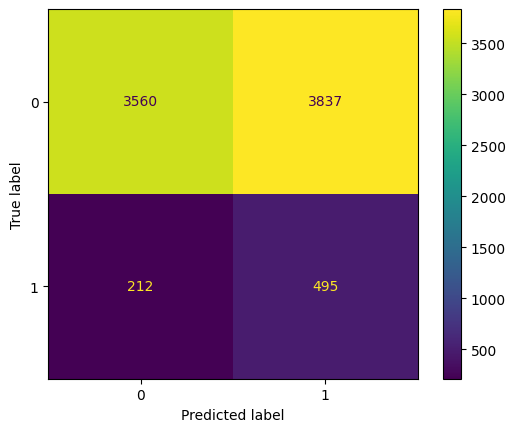

In [626]:
# Creamos nuestro modelo de árbol de decisión con una profundidad máxima de 10
modelo = DecisionTreeClassifier(max_depth=10)

# Entrenamos el modelo con los datos balanceados
modelo.fit(x_balanceada, y_balanceada)

# Realizamos predicciones usando el conjunto de prueba original
y_previsto = modelo.predict(X_test)

# Mostramos las métricas de evaluación: precisión, recall, f1-score y soporte
print(classification_report(y_test, y_previsto))

# Mostramos la matriz de confusión para visualizar el rendimiento del modelo
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);

**Explicación / Análisis de lo aprendido**

* En este bloque implementamos NearMiss (version=3), una técnica de undersampling que reduce la clase mayoritaria seleccionando ejemplos que están más alejados de la clase minoritaria. Esto permite equilibrar las clases y que el modelo preste más atención a los casos minoritarios (clientes morosos).

* Al evaluar el modelo con el conjunto de prueba original, observamos:

>* Recall para la clase 1 (morosos) = 0.71 → El modelo identifica correctamente el 71% de los clientes morosos, mejorando notablemente frente a otros enfoques anteriores.
>
>* Precision para la clase 1 = 0.12 → Aunque detecta más morosos, aún tiene una alta tasa de falsos positivos.
>
>* F1-score para la clase 1 = 0.20 → Se mantiene bajo debido a la baja precisión, aunque es un avance respecto a técnicas previas.

* La matriz de confusión confirma que el modelo logra capturar más verdaderos positivos (499 morosos correctamente detectados) comparado con resultados anteriores, aunque también clasifica erróneamente muchos clientes no morosos como morosos.

* En conclusión, NearMiss con árbol de decisión ha sido la técnica que mejor ha aumentado la capacidad del modelo para detectar morosos (recall alto), incluso sacrificando algo de precisión. Este comportamiento es deseable en escenarios donde es más costoso no detectar un moroso que enviar una alerta falsa.

---
**En esta clase, aprendiste a:**
* Utilizar oversampling y undersampling en datos desbalanceados;
* Utilizar técnicas de balanceo de datos y entender sus ventajas y desventajas;
* Aplicar un pipeline junto con la validación cruzada;
* Probar modelos de clasificación.
---

## Desafío: Hora de la práctica

Vamos a practicar el contenido que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente con datos de pacientes a ser diagnosticados con diabetes o no. Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario. Para realizar los desafíos, descarga la base de datos desde este [enlace](https://github.com/alura-es-cursos/2162-clasificacion-validacion-de-modelos-y-metricas/blob/desafios/diabetes.csv).



### 1) Clasificando Datos

>* **1 -** Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y **divide los datos en variables explicativas y variable objetivo** (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con pandas.
>
>* **2 -** Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. **Realiza la división de los datos entre entrenamiento, validación y prueba**. Utiliza el **5% de los datos para prueba** y con el resto, deja el **25% para validación**. En el momento de la separación, usa el parámetro stratify a partir de la variable objetivo para mantener la proporción de los datos.
>
>* **3 -** **La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores**. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño. Crea 2 modelos utilizando los algoritmos **DecisionTreeClassifier y RandomForestClassifier** y evalúa la precisión de entrenamiento y prueba, eligiendo el valor **3 para el parámetro max_depth del algoritmo DecisionTreeClassifier** y el **valor 2 para el max_depth del algoritmo RandomForestClassifier**, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.
>
>* **4 -** La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. **Construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción**. Para construir la matriz, usa el método predict para generar las predicciones de los valores y comparar con los valores reales de la base de datos.

#### Lectura de datos y separación de variables explicativas y respuesta

In [627]:
import pandas as pd

In [628]:
url_desafio = 'https://raw.githubusercontent.com/DanielRaiicHu/clasificacion_validacion_y_metricas/main/diabetes.csv'
datos_desafio = pd.read_csv(url_desafio)
datos_desafio

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


In [629]:
X_desafio = datos_desafio.drop(columns='diabetes',axis=1)
y_desafio = datos_desafio['diabetes']

#### División de Datos: Entrenamiento, Validación y Prueba

In [630]:
from sklearn.model_selection import train_test_split

In [631]:
# División inicial: General vs Prueba
X_desafio, X_test_desafio, y_desafio, y_test_desafio = train_test_split(X_desafio, y_desafio, test_size= 0.05, stratify = y_desafio, random_state = 5)

# División secundaria: Entrenamiento vs Validación
X_train_desafio, X_val_desafio, y_train_desafio, y_val_desafio = train_test_split(X_desafio, y_desafio, stratify = y_desafio, random_state = 5)

#### Modelos: DecisionTreeClassifier y RandomForestClassifier

In [632]:
# Modelo Árbol
from sklearn.tree import DecisionTreeClassifier
modelo_arbol_desafio = DecisionTreeClassifier(max_depth=3) # Límite de profundidad = 3
modelo_arbol_desafio.fit(X_train_desafio,y_train_desafio)                   # Vuelve a entrenar
print(f'La exactitud del Modelo de Árbol con el conjunto de entrenamiento es de: {modelo_arbol_desafio.score(X_train_desafio,y_train_desafio)}')
print(f'La exactitud del Modelo de Árbol con el conjunto de validación es de: {modelo_arbol_desafio.score(X_val_desafio,y_val_desafio)}')

# Respuesta:
# La exactitud del Modelo con de Árbol el conjunto de entrenamiento es de: 0.7571428571428571
# La exactitud del Modelo con de Árbol el conjunto de validación es de: 0.776595744680851

La exactitud del Modelo de Árbol con el conjunto de entrenamiento es de: 0.7571428571428571
La exactitud del Modelo de Árbol con el conjunto de validación es de: 0.776595744680851


In [633]:
# Modelo Forest
from sklearn.ensemble import RandomForestClassifier
modelo_forest_desafio = RandomForestClassifier(max_depth=2) # Límite de profundidad = 2
modelo_forest_desafio.fit(X_train_desafio,y_train_desafio)                   # Vuelve a entrenar
print(f'La exactitud del Modelo Forest con el conjunto de entrenamiento es de: {modelo_forest_desafio.score(X_train_desafio,y_train_desafio)}')
print(f'La exactitud del Modelo Forest con el conjunto de validación es de: {modelo_forest_desafio.score(X_val_desafio,y_val_desafio)}')

# Respuesta:
# La exactitud del Modelo Forest con el conjunto de entrenamiento es de: 0.7285714285714285
# La exactitud del Modelo Forest con el conjunto de validación es de: 0.7021276595744681

La exactitud del Modelo Forest con el conjunto de entrenamiento es de: 0.725
La exactitud del Modelo Forest con el conjunto de validación es de: 0.6808510638297872


#### Matriz de Confusión

In [634]:
from sklearn.metrics import confusion_matrix

In [635]:
# Matriz de Confusión tipo Array - Modelo Árbol
y_previsto_arbol_desafio = modelo_arbol_desafio.predict(X_val_desafio)
matriz_confusion_arbol_desafio = confusion_matrix(y_val_desafio,y_previsto_arbol_desafio)
print(matriz_confusion_arbol_desafio)

[[52 11]
 [10 21]]


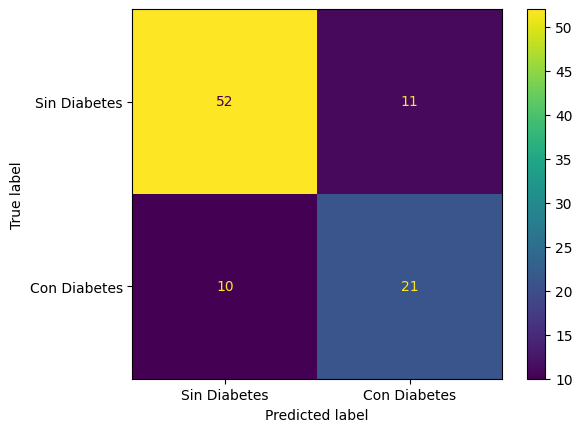

In [636]:
# Matriz de Confusión - Modelo Árbol
visualizacion_arbol_desafio = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion_arbol_desafio,
    display_labels=['Sin Diabetes', 'Con Diabetes']  # Etiquetas para las clases 0 y 1
)

visualizacion_arbol_desafio.plot();

In [637]:
# Matriz de Confusión tipo Array - Modelo Forest
y_previsto_forest_desafio = modelo_forest_desafio.predict(X_val_desafio)
matriz_confusion_forest_desafio = confusion_matrix(y_val_desafio,y_previsto_forest_desafio)
print(matriz_confusion_forest_desafio)

[[59  4]
 [26  5]]


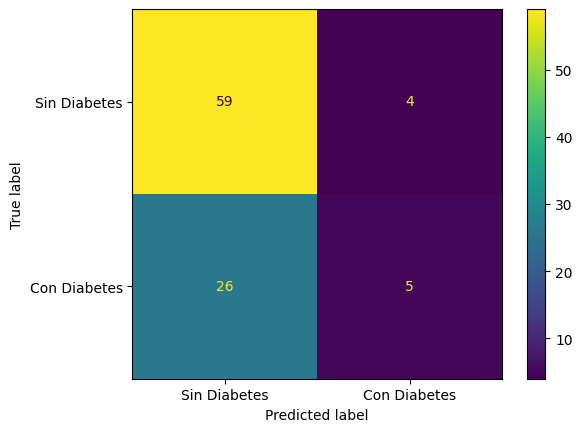

In [638]:
# Matriz de Confusión - Modelo Forest
visualizacion_forest_desafio = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion_forest_desafio,
    display_labels=['Sin Diabetes', 'Con Diabetes']  # Etiquetas para las clases 0 y 1
)

visualizacion_forest_desafio.plot();

### 2) Métricas de evaluación

**Estos desafíos dependen del modelo generado en los desafíos de la clase 1.**

**`1 -`** Para una evaluación completa de un modelo de clasificación, podemos explorar métricas que evalúan la tasa de acierto general y también para cada clase de la variable objetivo de forma individual. **`Extrae las métricas de precisión, recall, accuracy y F1-Score de los modelos de clasificación generados en el desafío de la clase 1.`** La biblioteca Scikit-Learn tiene funciones para calcular cada una de las métricas, solo necesitas importar y utilizar como parámetros los valores reales y previstos por el modelo.

**`2 -`** Además de métricas numéricas, se pueden explorar gráficos para evaluar el rendimiento de un modelo y comprender si puede diferenciar bien una clase de otra. **`Obtén la curva ROC y la métrica AUC`** de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva ROC se puede generar usando el método RocCurveDisplay.from_predictions.

**`3 -`** Además de la curva ROC, la curva de precisión x recall se puede usar para evaluar el rendimiento de modelos, siendo más interesante para datos desbalanceados. **`Obtén la curva de precisión x recall y la métrica AP`** de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva de precisión x recall se puede generar usando el método PrecisionRecallDisplay.from_predictions.

**`4 -`** Un resumen de las principales métricas de clasificación puede ser muy útil para resumir la información y generar insights de forma rápida. **`Genera los informes de métricas de los modelos de clasificación construidos en el desafío de la clase 1`**. El informe de métricas se puede generar a partir de la función classification_report de la biblioteca Scikit-Learn.

#### Extraer Métricas: Precisión, Recall, Accuracy y F1

In [639]:
# Importamos las principales métricas para modelos de clasificación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [640]:
# Métricas Modelo Árbol
print(f'La precisión del modelo de árbol es: {precision_score(y_val_desafio,y_previsto_arbol_desafio)}')
print(f'La sensibilidad (recall) del modelo de árbol es: {recall_score(y_val_desafio,y_previsto_arbol_desafio)}')
print(f'La exactitud (accuracy) del modelo de árbol es: {accuracy_score(y_val_desafio,y_previsto_arbol_desafio)}')
print(f'El F1-Score del modelo de árbol es: {f1_score(y_val_desafio,y_previsto_arbol_desafio)}')

La precisión del modelo de árbol es: 0.65625
La sensibilidad (recall) del modelo de árbol es: 0.6774193548387096
La exactitud (accuracy) del modelo de árbol es: 0.776595744680851
El F1-Score del modelo de árbol es: 0.6666666666666666


In [641]:
# Métricas Modelo Forest
print(f'La precisión del modelo forest es: {precision_score(y_val_desafio,y_previsto_forest_desafio)}')
print(f'La sensibilidad (recall) del modelo forest es: {recall_score(y_val_desafio,y_previsto_forest_desafio)}')
print(f'La exactitud (accuracy) del modelo forest es: {accuracy_score(y_val_desafio,y_previsto_forest_desafio)}')
print(f'El F1-Score del modelo forest es: {f1_score(y_val_desafio,y_previsto_forest_desafio)}')

La precisión del modelo forest es: 0.5555555555555556
La sensibilidad (recall) del modelo forest es: 0.16129032258064516
La exactitud (accuracy) del modelo forest es: 0.6808510638297872
El F1-Score del modelo forest es: 0.25


#### Curva ROC y Métrica AUC

In [642]:
# Importamos la herramienta para graficar la curva ROC
from sklearn.metrics import RocCurveDisplay
# Importamos la función para calcular el área bajo la curva ROC (AUC)
from sklearn.metrics import roc_auc_score

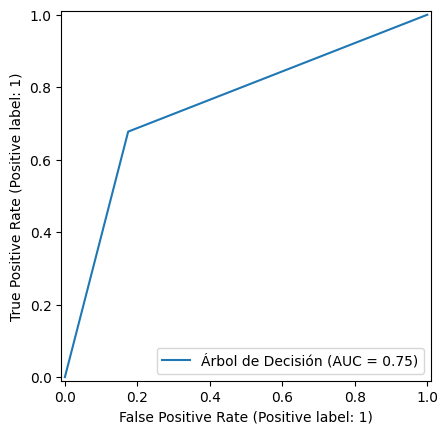

In [643]:
# Curva ROC Modelo Árbol
RocCurveDisplay.from_predictions(y_val_desafio,y_previsto_arbol_desafio, name='Árbol de Decisión');

In [644]:
# El Área Bajo la Curva (AUC) - Modelo Árbol
print(f'El área bajo la curva ROC del modelo de árbol es de: {roc_auc_score(y_val_desafio, y_previsto_arbol_desafio)}')

El área bajo la curva ROC del modelo de árbol es de: 0.7514080901177674


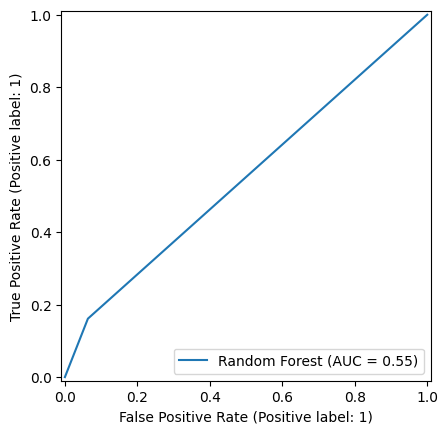

In [645]:
# Curva ROC Modelo Forest
RocCurveDisplay.from_predictions(y_val_desafio,y_previsto_forest_desafio, name='Random Forest');

In [646]:
# El Área Bajo la Curva (AUC) - Modelo Forest
print(f'El área bajo la curva ROC del modelo forest es de: {roc_auc_score(y_val_desafio, y_previsto_forest_desafio)}')

El área bajo la curva ROC del modelo forest es de: 0.5488991295442909


#### Curva de Precisión x Recall y Métrica AP (Average Precision)

In [647]:
# Importamos la clase que permite graficar la curva Precisión vs Recall
from sklearn.metrics import PrecisionRecallDisplay

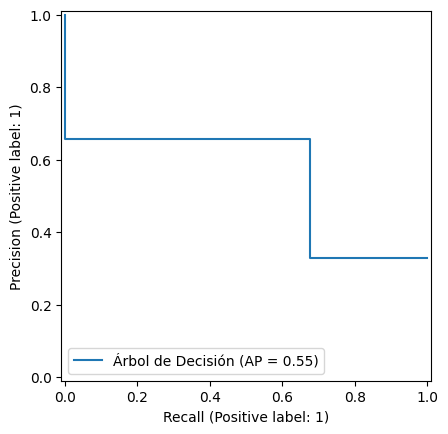

In [648]:
# Curva de Precisión x Recall - Modelo Árbol
PrecisionRecallDisplay.from_predictions(y_val_desafio, y_previsto_arbol_desafio, name='Árbol de Decisión');

In [649]:
# Métrica AP - Modelo Árbol
print(f'El score promedio de precisión vs recall para el modelo de árbol es de: {average_precision_score(y_val_desafio, y_previsto_arbol_desafio)}')

El score promedio de precisión vs recall para el modelo de árbol es de: 0.5509394303363074


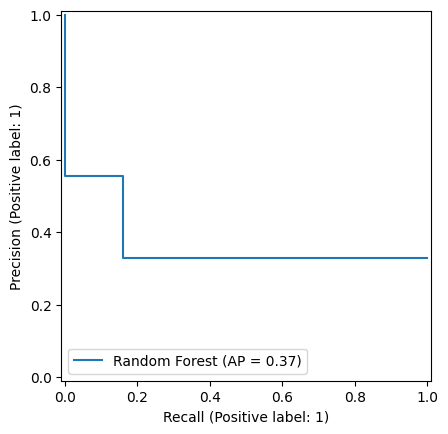

In [650]:
# Curva de Precisión x Recall - Modelo Forest
PrecisionRecallDisplay.from_predictions(y_val_desafio, y_previsto_forest_desafio, name='Random Forest');

In [651]:
# Métrica AP - Modelo Forest
print(f'El score promedio de precisión vs recall para el modelo forest es de: {average_precision_score(y_val_desafio, y_previsto_forest_desafio)}')

El score promedio de precisión vs recall para el modelo forest es de: 0.3662014794478762


#### Informe de Métricas

In [652]:
# Informe de Métricas
from sklearn.metrics import classification_report

In [653]:
# Informe de Métricas para Modelo de Árbol
print(f'Informe de Métricas para Modelo de Árbol:\n\n{classification_report(y_val_desafio, y_previsto_arbol_desafio)}')

print('\n*******************************************************\n')

# Informe de Métricas para Modelo Forest
print(f'Informe de Métricas para Modelo Forest:\n\n{classification_report(y_val_desafio, y_previsto_forest_desafio)}')

Informe de Métricas para Modelo de Árbol:

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        63
           1       0.66      0.68      0.67        31

    accuracy                           0.78        94
   macro avg       0.75      0.75      0.75        94
weighted avg       0.78      0.78      0.78        94


*******************************************************

Informe de Métricas para Modelo Forest:

              precision    recall  f1-score   support

           0       0.69      0.94      0.80        63
           1       0.56      0.16      0.25        31

    accuracy                           0.68        94
   macro avg       0.62      0.55      0.52        94
weighted avg       0.65      0.68      0.62        94



### 3) Validación Cruzada

**`1 -`** En el proceso de validación cruzada, se generan diferentes modelos para cada división realizada en los datos y, en consecuencia, diferentes valores de métricas de evaluación. Para encontrar un resultado promedio de las métricas, se puede construir un `intervalo de confianza` a partir de la media y la desviación estándar de las métricas. Crea una función para calcular el intervalo de confianza de los resultados de una validación cruzada con 2 desviaciones estándar. **`La función necesita 2 parámetros: uno para recibir una lista con los resultados de las métricas de la validación cruzada y otro para recibir el nombre del algoritmo`**. Para generar el intervalo de confianza, extrae la media de los resultados de la lista y la desviación estándar. El intervalo de confianza debe ser presentado en un print con el valor mínimo siendo la media restada de 2 desviaciones estándar y el valor máximo siendo la media sumada de 2 desviaciones estándar. Ejemplo de retorno de la función:

`Intervalo de confianza ("nombre del modelo"): ["valor mínimo del intervalo", "valor máximo del intervalo"]`

**`2 -`** KFold es la estrategia más simple de validación cruzada, que permite la división aleatoria de los datos en k partes, siendo utilizada una parte para validación y el resto para entrenamiento del modelo. El proceso de creación de modelos se repite hasta que todas las partes son utilizadas como validación. Sabiendo esto, `evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada con el método KFold, usando 10 partes`, con el uso del parámetro n_splits y mezclando los datos antes de la separación con el parámetro shuffle. `Usa el método cross_val_score que no retorna el tiempo de ejecución, solo las métricas.`

**`3 -`** En el proceso de división de datos con el KFold aleatorio, puede ser que la proporción de cada categoría de la variable objetivo no se mantenga en cada una de las partes de los datos. Para mantener esa proporción en cada una de las partes, podemos `utilizar el KFold estratificado`, haciendo que el proceso de validación de datos sea mucho más consistente. Evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada (cross_val_score) con el método StratifiedKFold, usando el parámetro n_splits y mezclando los datos antes de la separación con el parámetro shuffle y evaluando la métrica **`F1-Score usando el parámetro scoring`**.

**`4 -`** En conjuntos de datos con pocos registros (pocas filas), las estrategias de separación de los datos para validación pueden hacer que quede poca información en los datos de entrenamiento, haciendo que el modelo no comprenda bien el patrón de los datos. El `LeaveOneOut` es una estrategia para sortear este problema, utilizando solo un registro como dato de validación. Evalúa el desempeño de los modelos utilizando la validación cruzada (cross_val_score) con el método LeaveOneOut.

El método LeaveOneOut generará un modelo para cada una de las filas de la base de datos, por lo tanto, la lista de resultados tendrá tasa de acierto solo de 0 o 1 para cada modelo. De esta forma, extrae solo la media del resultado con el método mean(), sin utilizar el intervalo de confianza.

#### Intervalo de confianza con validación cruzada

In [654]:
from sklearn.model_selection import KFold, cross_validate

In [655]:
kf_desafio = KFold(n_splits=10, shuffle=True, random_state = 5)

In [656]:
# Métricas Modelo Árbol
cv_arbol_desafio = cross_validate(modelo_arbol_desafio, X_desafio, y_desafio, cv=kf_desafio)

In [657]:
# Métricas Modelo Random Forest
cv_forest_desafio = cross_validate(modelo_forest_desafio, X_desafio, y_desafio, cv=kf_desafio)

In [658]:
# Calcula el intervalo de confianza a partir de un diccionario de resultados.
# Usa el promedio y desviación estándar de los valores de test_score.
def intervalo_confianza_desafio_test_score(nombre_modelo, resultado):
  promedio = resultado['test_score'].mean()
  desvio_std = resultado['test_score'].std()
  print(f'El intervalo de confianza del Modelo {nombre_modelo} es de: {promedio-2*desvio_std},{min(promedio+2*desvio_std , 1)}')

In [659]:
# Intervalos de confianza para Modelos de Árbol y Random Forest
intervalo_confianza_desafio_test_score('Árbol de Decisión',cv_arbol_desafio)
intervalo_confianza_desafio_test_score('Random Forest',cv_forest_desafio)

El intervalo de confianza del Modelo Árbol de Decisión es de: 0.5337181765177326,0.8684155361422958
El intervalo de confianza del Modelo Random Forest es de: 0.5935708529993637,0.7906396733164258


#### KFold

In [660]:
from sklearn.model_selection import KFold, cross_val_score

In [661]:
modelo_arbol_desafio = DecisionTreeClassifier(max_depth=3)
modelo_forest_desafio = RandomForestClassifier(max_depth = 2)
kf_desafio = StratifiedKFold(n_splits=10, shuffle=True, random_state=5, )

In [662]:
# Calcula el intervalo de confianza desde el modelo y los datos.
# Utiliza cross_val_score para obtener un array de resultados de test.

def intervalo_confianza_desafio_cv_score(nombre_modelo, modelo):
    resultado = cross_val_score(modelo, X_desafio, y_desafio, cv=kf_desafio)
    promedio = resultado.mean()
    desvio_std = resultado.std()
    print(f'El intervalo de confianza del Modelo {nombre_modelo} es de: {promedio-2*desvio_std:.4f}, {min(promedio+2*desvio_std , 1):.4f}')

In [663]:
intervalo_confianza_desafio_cv_score('Árbol de Decisión', modelo_arbol_desafio,)
intervalo_confianza_desafio_cv_score('Random Forest', modelo_forest_desafio,)

El intervalo de confianza del Modelo Árbol de Decisión es de: 0.6283, 0.7671
El intervalo de confianza del Modelo Random Forest es de: 0.6173, 0.7733


### StratifiedKFold

In [664]:
# Importamos StratifiedKFold, que mantiene la proporción de clases en cada fold
from sklearn.model_selection import StratifiedKFold

In [665]:
modelo_arbol_desafio = DecisionTreeClassifier(max_depth=3)
modelo_forest_desafio = RandomForestClassifier(max_depth = 2)
skf_desafio = StratifiedKFold(n_splits=10, shuffle=True, random_state=5, )

In [666]:
def intervalo_confianza_desafio_skf(nombre_modelo, modelo):
    f1_scores = cross_val_score(modelo, X_desafio, y_desafio, cv=skf_desafio, scoring='f1')
    promedio = f1_scores.mean()
    desvio_std = f1_scores.std()
    print(f'El intervalo de confianza del Modelo {nombre_modelo} (con F1-Scores) es de: {promedio-2*desvio_std:.4f}, {min(promedio+2*desvio_std , 1):.4f}')

In [667]:
intervalo_confianza_desafio_skf('Árbol de Decisión', modelo_arbol_desafio,)
intervalo_confianza_desafio_skf('Random Forest', modelo_forest_desafio,)

El intervalo de confianza del Modelo Árbol de Decisión (con F1-Scores) es de: 0.2717, 0.7462
El intervalo de confianza del Modelo Random Forest (con F1-Scores) es de: 0.1137, 0.5977


#### LeaveOneOut

In [668]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

In [669]:
modelo_arbol_desafio = DecisionTreeClassifier(max_depth=3)
modelo_forest_desafio = RandomForestClassifier(max_depth = 2)
loo_desafio  = LeaveOneOut()

In [670]:
# Función con LeaveOneOut que calcula el promedio de acierto
def promedio_desafio_con_loo(nombre_modelo, modelo):
    resultados = cross_val_score(modelo, X_desafio, y_desafio, cv=loo_desafio)
    promedio = resultados.mean()
    print(f'La precisión media del Modelo {nombre_modelo} con LeaveOneOut es: {promedio:.4f}')

In [671]:
promedio_desafio_con_loo('Árbol de Decisión', modelo_arbol_desafio)
promedio_desafio_con_loo('Random Forest', modelo_forest_desafio)

La precisión media del Modelo Árbol de Decisión con LeaveOneOut es: 0.7086
La precisión media del Modelo Random Forest con LeaveOneOut es: 0.6872


### 4) Balanceo de datos

* **`1 -`** El desbalanceo de los datos de la variable objetivo puede hacer que el modelo se incline a acertar los patrones de solo la categoría que tiene mayor cantidad, haciendo necesario en algunos casos un tratamiento específico de balanceo de datos. La etapa inicial es identificar si existe o no el desbalanceo de datos en la variable objetivo. Por eso, **`verifica la proporción`** de datos de la variable objetivo del conjunto de datos de diabetes. Este análisis puede hacerse a partir del porcentaje de datos, `utilizando el método value_counts(normalize=True)` o con la utilización de un `gráfico de conteo, usando el gráfico countplot` de la biblioteca seaborn para entender si hay un desbalanceo de datos.

* **`2 -`** Al realizar el balanceo de datos en una validación cruzada, es necesario utilizar un `pipeline`, para que los datos de validación no sean balanceados, manteniéndose en el estándar de los datos del mundo real. Utiliza un `pipeline que contenga el ajuste del modelo y el balanceo de los datos usando el oversampling con SMOTE, obteniendo la media del F1-Score de una validación cruzada con StratifiedKFold.`

* **`3 -`** Además del oversampling, es posible utilizar la estrategia de `undersampling` para hacer el balanceo de los datos. A pesar de ser estrategias distintas, ambas requieren de un pipeline por tratarse de balanceo de datos en una validación cruzada. Utiliza `un pipeline que contenga el ajuste del modelo y el balanceo de los datos usando el undersampling con NearMiss en su versión 3, obteniendo la media del F1-Score de una validación cruzada con StratifiedKFold.`

* **`4 -`** Después de realizar diversas análisis y mejorar el rendimiento de los modelos, llega la etapa final, que consiste en `seleccionar el modelo con mejor rendimiento y hacer la evaluación final` en un conjunto de datos de prueba, que no ha sido visto durante el proceso de entrenamiento y validación. Elige el modelo que obtuvo el mejor rendimiento al comparar las estrategias de oversampling y undersampling y entrena un modelo usando todos los datos con la mejor estrategia. `Realiza la evaluación del modelo usando los datos de prueba` que fueron separados al inicio de los desafíos, `obteniendo el informe de métricas y matriz de confusión.`

#### Verificar Proporción

In [672]:
datos_desafio['diabetes'].value_counts()

,count
diabetes,
0,264
1,130


In [673]:
round(datos_desafio['diabetes'].value_counts(normalize=True),4) * 100

,proportion
diabetes,
0,67.01
1,32.99


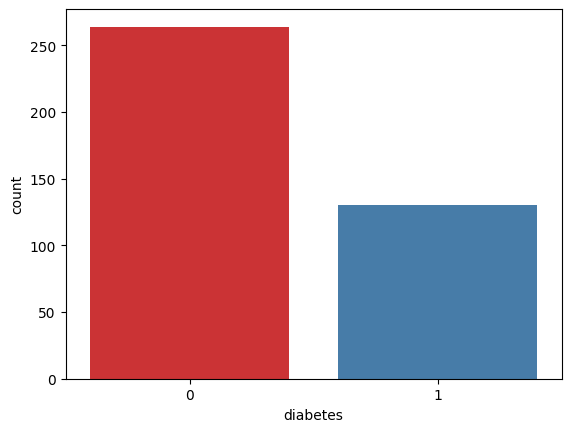

In [674]:
import seaborn as sns

sns.countplot(datos_desafio, x='diabetes', hue='diabetes', palette='Set1', legend=False);

In [675]:
import plotly.express as px

fig = px.histogram(datos_desafio, x='diabetes', color= 'diabetes', title="Proporción", width=700, height=400, pattern_shape='diabetes')
fig.show()
# px.histogram(datos_desafio, x='diabetes', color= 'diabetes', text_auto=True)

#### Oversampling

In [676]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

In [677]:
# Modelo Árbol de Decisión
modelo_arbol_desafio = DecisionTreeClassifier(max_depth = 3)
pipeline_desafio_arbol = imbpipeline([('oversample', SMOTE()),('arbol', modelo_arbol_desafio)])
skf_desafio = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
resultado_desafio_arbol = cross_val_score(pipeline_desafio_arbol, X_desafio, y_desafio, cv=skf_desafio, scoring='f1')
print(f'F1 de Modelo de Árbol de Decisión es de: {resultado_desafio_arbol.mean()}')

F1 de Modelo de Árbol de Decisión es de: 0.5453614368272813


In [678]:
# Modelo Random Forest
modelo_forest_desafio = RandomForestClassifier(max_depth = 2)
pipeline_desafio_forest = imbpipeline([('oversample', SMOTE()),('forest', modelo_forest_desafio)])
skf_desafio = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
resultado_desafio_forest = cross_val_score(pipeline_desafio_forest, X_desafio, y_desafio, cv=skf_desafio, scoring='f1')
print(f'F1 de Modelo Random Forest es de: {resultado_desafio_forest.mean()}')

F1 de Modelo Random Forest es de: 0.6168981728210937


#### Undersampling

In [679]:
from imblearn.under_sampling import NearMiss

In [680]:
# Modelo Árbol de Decisión
modelo_arbol_desafio = DecisionTreeClassifier(max_depth = 3)
pipeline_desafio_arbol = imbpipeline([('undersample', NearMiss(version = 3)),('arbol', modelo_arbol_desafio)])
skf_desafio = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
resultado_desafio_arbol = cross_val_score(pipeline_desafio_arbol, X_desafio, y_desafio, cv=skf_desafio, scoring='f1')
print(f'F1 de Modelo de Árbol de Decisión es de: {resultado_desafio_arbol.mean()}')

F1 de Modelo de Árbol de Decisión es de: 0.5449681473471796


In [681]:
# Modelo Random Forest
modelo_forest_desafio = RandomForestClassifier(max_depth = 2)
pipeline_desafio_forest = imbpipeline([('undersample', NearMiss(version = 3)),('forest', modelo_forest_desafio)])
skf_desafio = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
resultado_desafio_forest = cross_val_score(pipeline_desafio_forest, X_desafio, y_desafio, cv=skf_desafio, scoring='f1')
print(f'F1 de Modelo Random Forest es de: {resultado_desafio_forest.mean()}')

F1 de Modelo Random Forest es de: 0.6224205116362777


#### Evaluación del mejor modelo usando el conjunto de prueba

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.50      0.71      0.59         7

    accuracy                           0.65        20
   macro avg       0.65      0.66      0.64        20
weighted avg       0.70      0.65      0.66        20



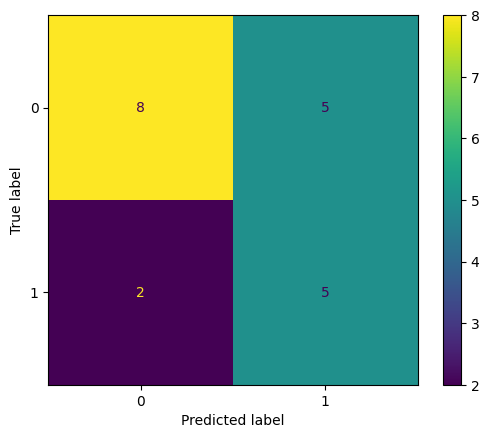

In [682]:
# Modelo Forest con undersampling usando NearMiss v3: reduce la clase mayoritaria conservando los casos más “difíciles”
undersample_desafio = NearMiss(version=3)

# Re-muestreo SOLO sobre el entrenamiento (evita contaminar el test)
x_balanceada_desafio, y_balanceada_desafio = undersample_desafio.fit_resample(X_desafio, y_desafio)

# Modelo: Random Forest (max_depth=2 para controlar complejidad). Recomendable fijar random_state.
modelo_forest_desafio = RandomForestClassifier(max_depth=2)

# Entrenamiento con datos ya balanceados por NearMiss
modelo_forest_desafio.fit(x_balanceada_desafio, y_balanceada_desafio)

# Predicción sobre el set de prueba original (sin aplicar ningún re-muestreo)
y_previsto_forest_desafio = modelo_forest_desafio.predict(X_test_desafio)

# Métricas por clase (precisión, recall, F1) y promedios
print(classification_report(y_test_desafio, y_previsto_forest_desafio))

# Matriz de confusión (TN, FP, FN, TP) para diagnóstico rápido de errores
ConfusionMatrixDisplay.from_predictions(y_test_desafio, y_previsto_forest_desafio);

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.50      0.57      0.53         7

    accuracy                           0.65        20
   macro avg       0.62      0.63      0.63        20
weighted avg       0.66      0.65      0.65        20



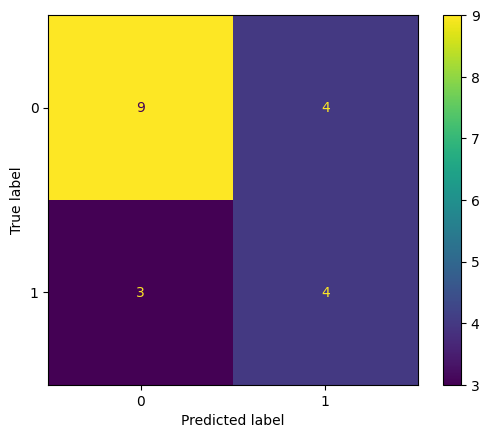

In [683]:
# Random Forest con Oversampling usando SMOTE: genera sintéticamente ejemplos de la clase minoritaria
modelo_base = RandomForestClassifier(random_state=5)

# Re-muestreo SOLO sobre el entrenamiento (evita data leakage)
oversample_desafio = SMOTE(random_state=5)
x_balanceada_desafio, y_balanceada_desafio = oversample_desafio.fit_resample(X_desafio, y_desafio)

# Entrenamiento con datos balanceados artificialmente por SMOTE
modelo_base.fit(x_balanceada_desafio, y_balanceada_desafio)

# Predicción sobre el set de prueba original (sin re-muestreo)
y_previsto_smote_desafio = modelo_base.predict(X_test_desafio)

# Métricas por clase (precisión, recall, F1) y promedios
print(classification_report(y_test_desafio, y_previsto_smote_desafio))

# Matriz de confusión (TN, FP, FN, TP) para análisis de aciertos y errores
ConfusionMatrixDisplay.from_predictions(y_test_desafio, y_previsto_smote_desafio);